In [1]:
#importing libraries
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Data Creation

In [2]:
input_data = []
output_data = []
data_size = 5000
sample_size = torch.randint(2,10,(data_size,))
for i in range(data_size):
    layer1 = torch.rand(sample_size[i])
    layer2 = torch.zeros(sample_size[i])
    indices = torch.randperm(sample_size[i])[:2]
    layer2[indices] = 1
    input_data.append(torch.stack((layer1,layer2)))
    output_data.append(torch.tensor([[layer1[indices].sum()]]))
print(input_data[69])
print(output_data[69])

tensor([[0.8201, 0.0090, 0.4231, 0.0384, 0.3069, 0.7420, 0.0100, 0.6517],
        [0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000]])
tensor([[0.4332]])


# Elmon RNN

In [3]:
#This function trains the parametres involved in elmon rnn and gives average loss over dataset during each epoch of training.
#Here the dimension of middle layer is 3.
def train_elmon(X,Y,epochs):
    W_hh = torch.randn(3,3,requires_grad = True,dtype = torch.float)
    W_hx = torch.randn(3,2,requires_grad = True,dtype = torch.float)
    b_h = torch.randn(3,1,requires_grad = True,dtype = torch.float)
    W_yh = torch.randn(1,3,requires_grad = True,dtype = torch.float)
    b_y = torch.randn(1,1,requires_grad = True,dtype = torch.float)
    optimiser = optim.SGD([W_hh,W_hx,b_h,W_yh,b_y],lr = 0.01)
    loss_fn = nn.MSELoss()
    loss_list = []
    for i in range(epochs):
        avg_loss = 0
        for j in range(len(X)):
            
            #forward-feed
            H = torch.zeros(3,1)
            for k in range(len(X[j][0])):
                H = torch.tanh(W_hh@H + W_hx@X[j][:,k].unsqueeze(1) + b_h)
            predict = W_yh@H + b_y
            
            loss = loss_fn(predict,Y[j])
            optimiser.zero_grad()
            loss.backward()
            optimiser.step()
            avg_loss = avg_loss + (loss.item()/len(X))
        loss_list.append(avg_loss)
        if(avg_loss<0.0001):
            break
    return loss_list
elmon_list = train_elmon(input_data,output_data,10)
print(elmon_list)

[0.15079014473741403, 0.11515709107233292, 0.09260467070265961, 0.07854920548273925, 0.08093885165242554, 0.07484314246748433, 0.07443653247971545, 0.07192892494777199, 0.09107189139738829, 0.08088820781532932]


# LSTM

In [4]:
#This function trains the parametres involved in LSTM and gives average loss over dataset during each epoch of training.
#Here the dimension of middle layer is 5.
def train_lstm(X,Y,epochs):
    W_f = torch.randn(5,7,requires_grad = True,dtype = torch.float)
    b_f = torch.zeros(5,1,requires_grad = True,dtype = torch.float)
    W_i = torch.randn(5,7,requires_grad = True,dtype = torch.float)
    b_i = torch.zeros(5,1,requires_grad = True,dtype = torch.float)
    W_C = torch.randn(5,7,requires_grad = True,dtype = torch.float)
    b_C = torch.zeros(5,1,requires_grad = True,dtype = torch.float)
    W_o = torch.randn(5,7,requires_grad = True,dtype = torch.float)
    b_o = torch.zeros(5,1,requires_grad = True,dtype = torch.float)
    W_yh = torch.randn(1,5,requires_grad = True,dtype = torch.float)
    b_y = torch.zeros(1,1,requires_grad = True,dtype = torch.float)
    optimiser = optim.SGD([W_f,b_f,W_i,b_i,W_C,b_C,W_o,b_o,W_yh,b_y],lr = 0.01)
    loss_fn = nn.MSELoss()
    loss_list = []
    for i in range(epochs):
        avg_loss = 0
        for j in range(len(X)):
            
            #forward-feed
            H = torch.zeros(5,1)
            C = torch.zeros(5,1)
            for k in range(len(X[j][0])):
                hx = torch.cat((H,X[j][:,k].unsqueeze(1)))
                f_t = torch.sigmoid(W_f@hx + b_f)
                i_t = torch.sigmoid(W_i@hx + b_i)
                can_c = torch.tanh(W_C@hx + b_C)
                C = torch.mul(f_t,C) + torch.mul(i_t,can_c)
                o_t = torch.sigmoid(W_o@hx + b_o)
                H = torch.mul(o_t,torch.tanh(C))
            predict = W_yh@H + b_y
            
            loss = loss_fn(predict,Y[j])
            optimiser.zero_grad()
            loss.backward()
            optimiser.step()
            avg_loss = avg_loss + (loss.item()/len(X))
        loss_list.append(avg_loss)
        if(avg_loss<0.0001):
            break
    return loss_list
lstm_list = train_lstm(input_data,output_data,10)
print(lstm_list)

[0.13854675814785244, 0.06703141177900303, 0.017718003221302337, 0.009162117675792916, 0.006718177451032914, 0.00544838617663239, 0.004645301751212095, 0.004085262052966543, 0.003667199743722123, 0.003339630576625557]


# GRU

In [5]:
#This function trains the parametres involved in GRU and gives average loss over dataset during each epoch of training.
#Here the dimension of middle layer is 3.
def train_gru(X,Y,epochs):
    W_r = torch.randn(5,5,requires_grad = True,dtype = torch.float)
    b_r = torch.randn(5,1,requires_grad = True,dtype = torch.float)
    W_z = torch.randn(3,5,requires_grad = True,dtype = torch.float)
    b_z = torch.randn(3,1,requires_grad = True,dtype = torch.float)
    W = torch.randn(3,5,requires_grad = True,dtype = torch.float)
    b = torch.randn(3,1,requires_grad = True,dtype = torch.float)
    W_yh = torch.randn(1,3,requires_grad = True,dtype = torch.float)
    b_y = torch.randn(1,1,requires_grad = True,dtype = torch.float)
    optimiser = optim.SGD([W_r,b_r,W_z,b_z,W,b,W_yh,b_y],lr = 0.01)
    loss_fn = nn.MSELoss()
    loss_list = []
    for i in range(epochs):
        avg_loss = 0
        for j in range(len(X)):
            
            #forward-feed
            H = torch.zeros(3,1)
            for k in range(len(X[j][0])):
                hx = torch.cat((H,X[j][:,k].unsqueeze(1)))
                z_t = torch.sigmoid(W_z@hx + b_z)
                r_t = torch.sigmoid(W_r@hx + b_r)
                can_H = torch.tanh(W@(torch.mul(r_t,hx)) + b)
                H = torch.mul(1-z_t,H) + torch.mul(z_t,can_H)
            predict = W_yh@H + b_y
            
            loss = loss_fn(predict,Y[j])
            optimiser.zero_grad()
            loss.backward()
            optimiser.step()
            avg_loss = avg_loss + (loss.item()/len(X))
        loss_list.append(avg_loss)
        if(avg_loss<0.0001):
            break
    return loss_list
gru_list = train_gru(input_data,output_data,10)
print(gru_list)

[0.14607724168997369, 0.05757521110988042, 0.030704517742383662, 0.02212973367358317, 0.01823098769754275, 0.01574192767511251, 0.013870131300701406, 0.01236083668285311, 0.011104390598112872, 0.010040868181774559]


# Baseline

In [6]:
#calculating loss of model which always predicts 1
base_loss = 0
for i in range(len(input_data)):
    loss_fn = nn.MSELoss()
    predict = torch.tensor([[1]])
    loss = loss_fn(predict,output_data[i])
    base_loss = base_loss + (loss.item()/len(input_data))
base_list = []
x_list = []
for i in range(10):
    base_list.append(base_loss)
    x_list.append(i+1)
print(base_list)

[0.16583144622633433, 0.16583144622633433, 0.16583144622633433, 0.16583144622633433, 0.16583144622633433, 0.16583144622633433, 0.16583144622633433, 0.16583144622633433, 0.16583144622633433, 0.16583144622633433]


# Comparison

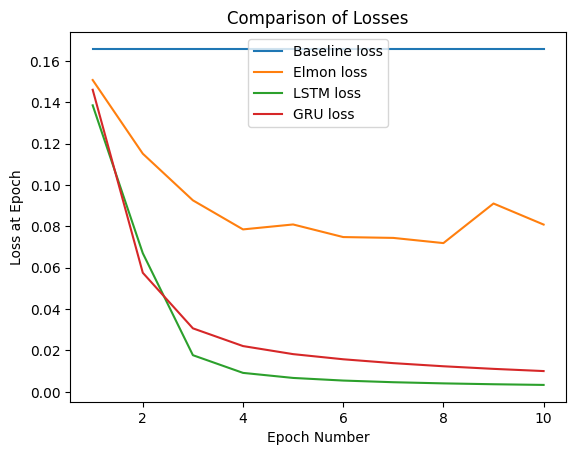

In [7]:
plt.figure()
plt.plot(x_list,base_list,label = "Baseline loss")
plt.plot(x_list,elmon_list,label = "Elmon loss")
plt.plot(x_list,lstm_list,label = "LSTM loss")
plt.plot(x_list,gru_list,label = "GRU loss")
plt.title('Comparison of Losses')
plt.xlabel('Epoch Number')
plt.ylabel('Loss at Epoch')
plt.legend()
plt.show()